[[ 25.72363461  79.18272351]
 [ 82.99366157  18.02183926]
 [ 52.16573844  47.31650627]
 [ 90.87691435  85.62044737]
 [123.47559749  17.58627819]]


[[[ 55.84853844 -12.03120056]
  [-12.03120056 109.3578347 ]]

 [[ 99.78409961  23.89996867]
  [ 23.89996867 115.98800648]]

 [[292.25586066 226.28091688]
  [226.28091688 309.08555601]]

 [[330.40531547 -54.90097583]
  [-54.90097583  69.03506893]]

 [[ 88.25958615  32.86480379]
  [ 32.86480379  49.14244717]]]


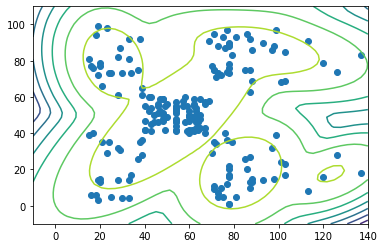

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

data.columns=['id', 'gender','age', 'income', 'spending']

# Changing sex attribute as male to 1 and Female to 0
dictionary = {'Male':1, 'Female':0}
data.gender=[dictionary[item] for item in data.gender]
del data['id']
del data['gender']
del data['age'] 

gmm = GaussianMixture(n_components=5)
gmm.fit(data)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-10, 140), np.linspace(-10,110))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data['income'], data['spending'])
plt.show()



